<a href="https://colab.research.google.com/github/AzlinRusnan/Machine-Learning/blob/main/Resampling_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resampling methods are crucial in machine learning for improving the accuracy of predictive models and for estimating the performance of these models on new data. These methods also help address issues like model overfitting or underfitting and allow us to make better use of limited data. Here are some key resampling techniques commonly used in machine learning:

Cross-Validation:

K-Fold Cross-Validation: The data set is split into 'k' smaller sets (or folds). The model is trained on 'k-1' of these folds, with the remaining part used as a test set. This is repeated such that each fold serves as the test set exactly once. This method helps in utilizing the data efficiently and provides a robust estimate of model performance.

Leave-One-Out Cross-Validation (LOOCV): A special case of k-fold cross-validation where k equals the number of data points in the dataset. Each sample is used once as a test set while the remaining serve as the training set. This is computationally expensive but can provide useful insights, especially for small datasets.

Bootstrap:

The bootstrap involves randomly sampling with replacement from the data set, typically the same size as the original data set, and using these samples to estimate the model accuracy. This method is particularly useful for estimating the variability of a model estimate.

Random Subsampling:

Similar to k-fold cross-validation, but without systematic rotation of which samples are used for training and testing. Random subsets of the data are repeatedly taken as training and testing sets. It’s usually quicker but less robust than cross-validation.

Stratified Sampling:

In stratified sampling, the data is divided in such a way that each subset contains approximately the same percentage of samples of each target class as the complete set. This is useful for dealing with imbalanced datasets.

Shuffle Split:

This method involves randomly shuffling and then splitting the data into training and testing datasets. This process is repeated n times. It provides flexibility in choosing the size of the train and test sets.

#**Chapter 5 Resampling Methods**
**Resampling** - repeatedly drawing samples from a training set and refitting a modelon each sample - to obtain additional info.

**Common resampling methods:** bootstraping and cross validation.

**Cross validation** can be used to estimate the test error to evaluate model perfomance (model assessment) or to select appropriate level of flexibility (model selection).

**Boostraping** provide a measure of accuracy of a parameter estimates or statistical learning method.

**Cross Validation**

Validation Set Approach



*   Usually a test set is not available so a simple strategy to create one is to split the available data into training and testing (validation or hold-out set).
*   Divide the data into half where the observation in each sets are randomly selected.

*   To assess the model perfomance - quantitative responses usually use MSE, for categorical can use error rate, area under the curve, F1 score, weighting of confusion matrix, etc...
*   Drawbacks of this technique:
   *   the validation estimation of the test error rate can be highly variable.
   *   the validation set error rate may tend to overestimate the test error rate




In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


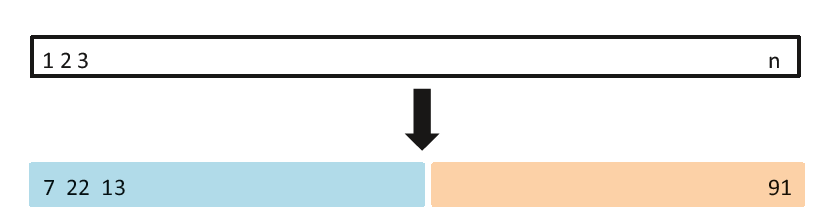

In [2]:
from IPython.display import Image
Image('/content/gdrive/MyDrive/STQD 6024 Machine Learning/pw41.PNG', width =500)

In [3]:
import pandas as pd
import numpy as np
import sklearn.linear_model as skl_lm
import matplotlib.pyplot as plt
%matplotlib inline

In this section, we'll explore the use of the validation set approach in order to estimate the test error rates that result from fitting various linear models on the  𝙰𝚞𝚝𝚘
  data set.

In [4]:
df1 = pd.read_csv("/content/gdrive/MyDrive/STQD 6024 Machine Learning/auto.csv", na_values='?').dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


We begin by using the  𝚜𝚊𝚖𝚙𝚕𝚎()
  function to split the set of observations into two halves, by selecting a random subset of 196 observations out of the original 392 observations. We refer to these observations as the training set.

We'll use the  𝚛𝚊𝚗𝚍𝚘𝚖⎯𝚜𝚝𝚊𝚝𝚎
  parameter in order to set a seed for  𝚙𝚢𝚝𝚑𝚘𝚗
 ’s random number generator, so that you'll obtain precisely the same results each time. It is generally a good idea to set a random seed when performing an analysis such as cross-validation that contains an element of randomness, so that the results obtained can be reproduced precisely at a later time.

In [5]:
train_df = df1.sample(196, random_state = 1)
test_df = df1[~df1.isin(train_df)].dropna(how = 'all')

X_train = train_df['horsepower'].values.reshape(-1,1)
y_train = train_df['mpg']
X_test = test_df['horsepower'].values.reshape(-1,1)
y_test = test_df['mpg']

We then use  𝙻𝚒𝚗𝚎𝚊𝚛𝚁𝚎𝚐𝚛𝚎𝚜𝚜𝚒𝚘𝚗()
  to fit a linear regression to predict  𝚖𝚙𝚐
  from  𝚑𝚘𝚛𝚜𝚎𝚙𝚘𝚠𝚎𝚛
  using only the observations corresponding to the training set.

In [6]:
lm = skl_lm.LinearRegression()
model = lm.fit(X_train, y_train)

We now use the  𝚙𝚛𝚎𝚍𝚒𝚌𝚝()
  function to estimate the response for the test observations, and we use  𝚜𝚔𝚕𝚎𝚊𝚛𝚗
  to caclulate the MSE.

In [7]:
pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, pred)

print(MSE)

23.361902892587224


Therefore, the estimated test MSE for the linear regression fit is 23.36. We can use the  𝙿𝚘𝚕𝚢𝚗𝚘𝚖𝚒𝚊𝚕𝙵𝚎𝚊𝚝𝚞𝚛𝚎𝚜()
  function to estimate the test error for the polynomial and cubic regressions.

In [8]:
from sklearn.preprocessing import PolynomialFeatures

# Quadratic
poly = PolynomialFeatures(degree=2)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

model = lm.fit(X_train2, y_train)
print(mean_squared_error(y_test, model.predict(X_test2)))

# Cubic
poly = PolynomialFeatures(degree=3)
X_train3 = poly.fit_transform(X_train)
X_test3 = poly.fit_transform(X_test)

model = lm.fit(X_train3, y_train)
print(mean_squared_error(y_test, model.predict(X_test3)))

20.252690858345748
20.325609365972525


These error rates are 20.25 and 20.33, respectively. If we choose a different training set instead, then we will obtain somewhat different errors on the validation set. We can test this out by setting a different random seed:

In [9]:
##Choose a different training set

train_df = df1.sample(196, random_state = 2)
test_df = df1[~df1.isin(train_df)].dropna(how = 'all')

X_train = train_df['horsepower'].values.reshape(-1,1)
y_train = train_df['mpg']
X_test = test_df['horsepower'].values.reshape(-1,1)
y_test = test_df['mpg']

# Linear
model = lm.fit(X_train, y_train)
print(mean_squared_error(y_test, model.predict(X_test)))

# Quadratic
poly = PolynomialFeatures(degree=2)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

model = lm.fit(X_train2, y_train)
print(mean_squared_error(y_test, model.predict(X_test2)))

# Cubic
poly = PolynomialFeatures(degree=3)
X_train3 = poly.fit_transform(X_train)
X_test3 = poly.fit_transform(X_test)

model = lm.fit(X_train3, y_train)
print(mean_squared_error(y_test, model.predict(X_test3)))

25.10853905288967
19.722533470492422
19.92136786007267


These results are consistent with our previous findings: a model that predicts 𝚖𝚙𝚐
 using a quadratic function of 𝚑𝚘𝚛𝚜𝚎𝚙𝚘𝚠𝚎𝚛
 performs better than a model that involves only a linear function of 𝚑𝚘𝚛𝚜𝚎𝚙𝚘𝚠𝚎𝚛
, and there is little evidence in favor of a model that uses a cubic function of  𝚑𝚘𝚛𝚜𝚎𝚙𝚘𝚠𝚎𝚛

### **Leave One Out Cross Validation**
+ LOOCV has only one observation in the test set and uses all other n-1 observations to build a model.
+ n different models are built leaving out each observation once and error is averaged over these n trials.  
$$\textrm{CV}_{(n)} = \frac{1}{n}\sum_{i=1}^n{\textrm{MSE}_i}$$
+ LOOCV is better than validation set approach. It has far less bias and tends to not overestimate the test error rate.
+ Model is built on nearly all the data and there is no randomness in the splits since each observation will be left out once.
+ It is computationally expensive especially with large n and a complex model.

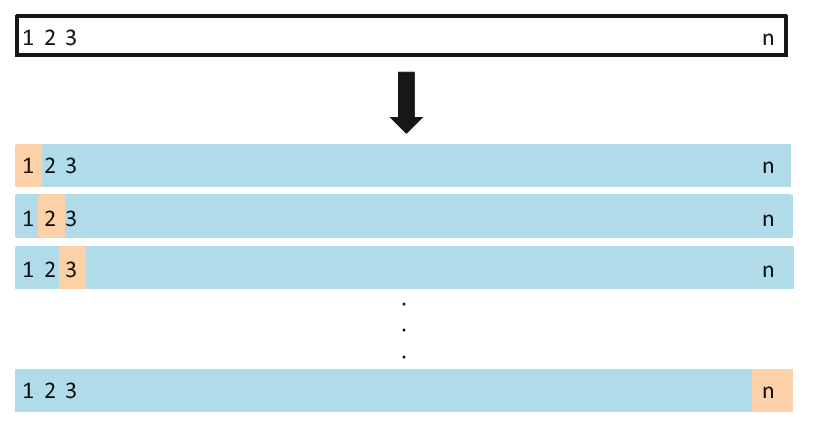

In [10]:
Image('/content/gdrive/MyDrive/STQD 6024 Machine Learning/pw42.PNG', width =500)

#### Example

In [11]:
model = lm.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score, LeaveOneOut
loo = LeaveOneOut()
X = df1['horsepower'].values.reshape(-1,1)
y = df1['mpg'].values.reshape(-1,1)
loo.get_n_splits(X)

from sklearn.model_selection import KFold

crossvalidation = KFold(n_splits=392, random_state=None, shuffle=False)

scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)

print("Folds: " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

Folds: 392, MSE: 24.231513517929226, STD: 36.79731503640535


We can repeat this procedure for increasingly complex polynomial fits.

To automate the process, we use the for() function to initiate a for loop which iteratively fits polynomial regressions for polynomials of order i = 1 to i = 5 and computes the associated cross-validation error.

In [12]:
for i in range(1,6):
    poly = PolynomialFeatures(degree=i)
    X_current = poly.fit_transform(X)
    model = lm.fit(X_current, y)
    scores = cross_val_score(model, X_current, y, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)

    print("Degree-"+str(i)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

Degree-1 polynomial MSE: 24.231513517929226, STD: 36.797315036405344
Degree-2 polynomial MSE: 19.248213124489737, STD: 34.99844615178235
Degree-3 polynomial MSE: 19.334984064092605, STD: 35.76513567783445
Degree-4 polynomial MSE: 19.424430307079565, STD: 35.683352752283625
Degree-5 polynomial MSE: 19.033202845369832, STD: 35.31730256892403


### k-fold cross validation
+ Similar to LOOCV but this time you leave some number greater than 1 out.
+ Here, $k$ is the number of partitions of your sample, so if you have $n=1000$ observations and k = 10, the each fold will be 100.
+ 900 observations would be the training set and 100 observations would act as your test set.
+ Get an MSE for each fold of these 100 observations and take the average.
$$\textrm{CV}_{(k)} = \frac{1}{k}\sum_{i=1}^k{\textrm{MSE}_i}$$
+ LOOCV is a special case of k-fold CV whenever $k=n$.
+ Computationally inexpensive compare to LOOCV.
+ Some variability compare to LOOCV.

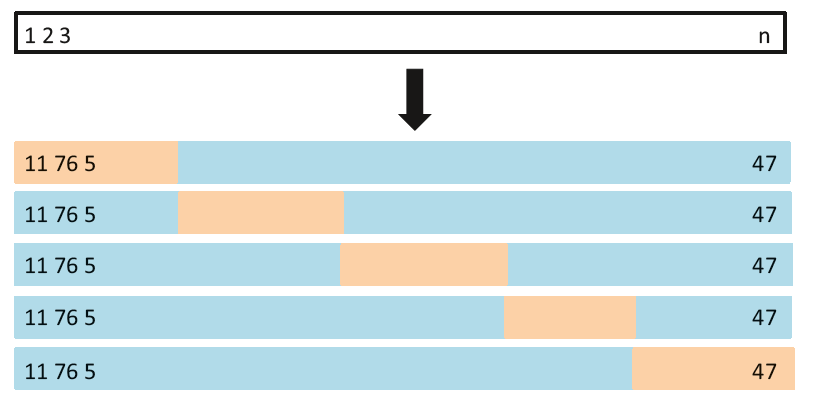

In [13]:
Image('/content/gdrive/MyDrive/STQD 6024 Machine Learning/pw43.PNG', width =500)

In [14]:
crossvalidation = KFold(n_splits=10, random_state=1, shuffle=False)

for i in range(1,11):
    poly = PolynomialFeatures(degree=i)
    X_current = poly.fit_transform(X)
    model = lm.fit(X_current, y)
    scores = cross_val_score(model, X_current, y, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)

    print("Degree-"+str(i)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

### bias-variance tradeoff between LOOCV and k-folds
+ Since LOOCV trains on nearly all the data, the test error rate will generally be lower than k-fold and therefore less biased.
+ LOOCV will have higher variance since all $n$ models will be very highly correlated to one another.
+ Since the models won't differ much, the test error rate (which what CV is measuring) will vary more than k-fold which has fewer models that are less correlated with one another.
+ A value of $k$ between 5 and 10 is a good rule of thumb that balances the trade-off between bias and variance

In [15]:
df2 = pd.read_csv("/content/gdrive/MyDrive/STQD 6024 Machine Learning/default.csv", na_values='?').dropna()
df2.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


In [16]:
df2.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


First we'll try just holding out a random 20% of the data:

In [17]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report

for i in range(1,11):
    train_df2 = df2.sample(8000, random_state = i)
    test_df2 = df2[~df2.isin(train_df2)].dropna(how = 'all')

    # Fit a logistic regression to predict default using balance
    model = smf.glm('default~balance', data=train_df2, family=sm.families.Binomial())
    result = model.fit()
    predictions_nominal = [ "Yes" if x < 0.5 else "No" for x in result.predict(test_df2)]
    print("----------------")
    print("Random Seed = " + str(i) + "")
    print("----------------")
    print(confusion_matrix(test_df2["default"],
                       predictions_nominal))
    print(classification_report(test_df2["default"],
                            predictions_nominal,
                            digits = 3))
    print()

----------------
Random Seed = 1
----------------
[[1921    6]
 [  50   23]]
              precision    recall  f1-score   support

          No      0.975     0.997     0.986      1927
         Yes      0.793     0.315     0.451        73

    accuracy                          0.972      2000
   macro avg      0.884     0.656     0.718      2000
weighted avg      0.968     0.972     0.966      2000


----------------
Random Seed = 2
----------------
[[1919   13]
 [  47   21]]
              precision    recall  f1-score   support

          No      0.976     0.993     0.985      1932
         Yes      0.618     0.309     0.412        68

    accuracy                          0.970      2000
   macro avg      0.797     0.651     0.698      2000
weighted avg      0.964     0.970     0.965      2000


----------------
Random Seed = 3
----------------
[[1918   14]
 [  49   19]]
              precision    recall  f1-score   support

          No      0.975     0.993     0.984      1932
    